# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random

### El módulo Random de python 


**Ejercicio 1:**

1.1 Defina lo que es una semilla y para qué sirve

__R:__ La semilla es un valor que se utiliza para generar números aleatorios.

Es utilizada ya que la generación de números aleatorios en Python utiliza una distribución llamada Mersenne Twister; y esta necesita de un y esta utliza la semilla como generador principal. En el caso de Python, si no se establece una semilla, esta será realizada utilizando la hora del sistema como referencia [1].

1.2 use random.random() para generar números aleatorios. 

In [3]:
random.random()

0.5426328817137805

1.3 use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()

In [4]:
random.seed(4)
random.random()

0.23604808973743452

1.4 ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?

In [5]:
random.seed(4)
random.random()

0.23604808973743452

__R:__ Al utilizarse la misma semilla, se genera el mismo número aleatorio.

Esto se debe a que la distribución tiene el mismo valor con el número dado.

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

In [6]:
def generagraficos():
    a,b,x,y,z=1,10,[],[],[]
    intervalos = range(a, b) 
    for i in range (1,1000):
        n=random.randint(a,b)
        x.append(n)
        n=random.randrange(a,b)
        y.append(n)
        n=random.uniform(a,b)
        z.append(n)

    fig, ax = plt.subplots(1, 3, figsize=(20, 4), dpi=80)
        
    ax[0].hist(x, bins=intervalos, rwidth=0.85)
    ax[0].set_title('Función: randint')
    ax[0].set(xlabel='Números', ylabel='Frecuencia')

    ax[1].hist(y, bins=intervalos, rwidth=0.85)
    ax[1].set_title('Función: randrange')
    ax[1].set(xlabel='Números', ylabel='Frecuencia')

    ax[2].hist(z, bins=intervalos, rwidth=0.85)
    ax[2].set_title('Función: uniform')
    ax[2].set(xlabel='Números', ylabel='Frecuencia')
    plt.show()

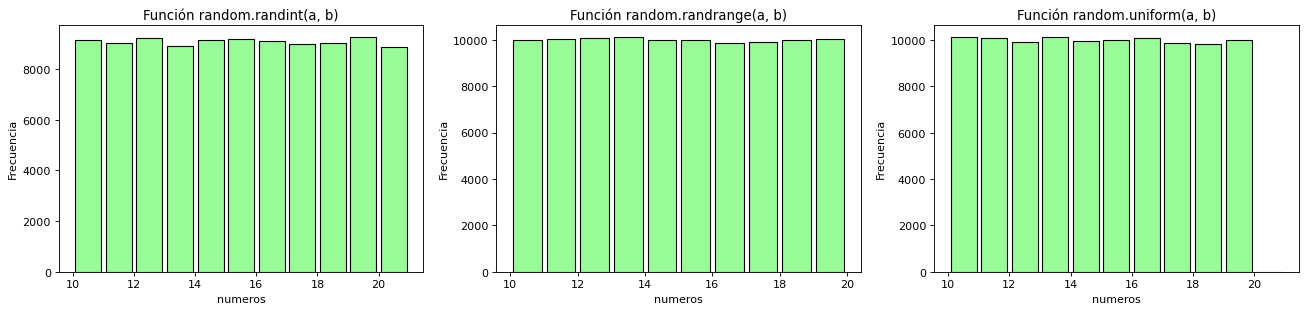

In [119]:
a,b = 10,20
x1=[]
x2=[]
x3=[]
intervalos = range(a,b+2)
for i in range (1,100000):
    x1.append(random.randint(a,b))
    x2.append(random.randrange(a, b))
    x3.append(random.uniform(a, b))
        
fig, ax = plt.subplots(1, 3, figsize=(20, 4), dpi=80)

ax[0].hist(x1, bins=intervalos, rwidth=0.85, color = 'palegreen',edgecolor = 'black')
ax[0].set_title('Función random.randint(a, b)')
ax[0].set(xlabel='numeros', ylabel='Frecuencia')

ax[1].hist(x2, bins=range(min(x2), max(x2) + 2), rwidth=0.85,color='palegreen',edgecolor = 'black')
ax[1].set_title('Función random.randrange(a, b)',)
ax[1].set(xlabel='numeros', ylabel='Frecuencia')

ax[2].hist(x3, bins=intervalos, rwidth=0.85, color='palegreen',edgecolor = 'black')
ax[2].set_title('Función random.uniform(a, b)')
ax[2].set(xlabel='numeros', ylabel='Frecuencia')

random.uniform(a, b)
plt.show()

* La función random.randint(a,b), devuelve un entero aleatorio en el rango [a, b], ambos incluidos. a debe ser inferior o igual a b.

* La función random.randrange(a, b), genera numeros pseudoaleatorios. Genera un número entero entre los valores generados por range a y b, pero sin incluir el b.

* La función random.uniform(a,b) devuelve un número aleatorio en el rango [a, b] extraído de una distribución uniforme. Genera un número decimal entre a y b (puede generar a, debido a la forma de redondear de Python, puede que genere b o no).

### Clase NotSoRandom:

In [8]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**

3.1 Use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?

Para este ejercicio se utilizaron dos formas de obtener el periodo:

i) El primero consiste en iterar con un for ampliando el valor del rango manualmente hasta llegar a la cantidad de iteraciones

In [68]:
seed(1234)
[random() for _ in range(19)]

[16, 10, 11, 14, 4, 12, 17, 13, 1, 3, 9, 8, 5, 15, 7, 2, 6, 18, 16]

ii) El segundo consiste en utilizar un while para buscar cuándo se volverá a repetir el valor iniciar

In [65]:
seed(1234) #Se establece la semilla
x = random() # Primer número aleatorio
y = random() # Segundo número aleatorio
n = 1
while(y != x):
    n+=1
    y = random()
print("La cantidad de iteraciones es:",n)

La cantidad de iteraciones es: 18


__R__: Se puede concluir que el periodo es 18

3.2 Intente con otra semilla y busque completar un ciclo. Comente.

Con ii) en mente, se prefirió realizar una función para poder obtener el periodo de cualquier semilla

In [66]:
def iteraciones(semilla):
    seed(semilla)
    numero_base = random()
    numero_siguiente = random()
    i = 1
    while(numero_base != numero_siguiente):
        numero_siguiente = random()
        i+=1
    return i

Se decidió calcular la semilla de los primeros 20 números para ver cuántas iteraciones requiere cada uno

In [67]:
[iteraciones(i) for i in range(20)]

[1, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1]

__R:__ Como se puede apreciar, la cantidad de iteraciones para realizar un ciclo es de 18.

Cabe destacar que por cada múltiplo de 19, el número resultado del número aleatorio será 0, ya que la fórmula para generar el número aleatorio utiliza el módulo de 19, el cuál siempre será 0 en ese número y en sus múltiplos.

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 


In [2]:
class GCL():
    def __init__(self, seed=345):
        self.u = seed
    def next(self):
        self.u = (16807*self.u)%2147483647
        return self.u/2147483647

2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.

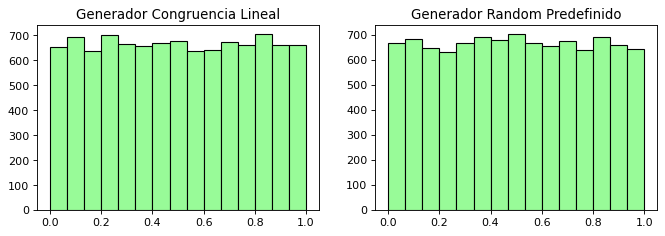

In [3]:
n = GCL()
n.next()
x1 = []
x2 = []
random.seed(345)
for i in range(10000):
    x1.append(n.next())
    x2.append(random.random())
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=80)
ax[0].hist(x1, color = 'palegreen', edgecolor = 'black', bins = 15)
ax[0].set_title('Generador Congruencia Lineal')
ax[1].hist(x2, color = 'palegreen', edgecolor = 'black', bins = 15)
ax[1].set_title('Generador Random Predefinido')
plt.show()

Como se observa en los histogramas, se puede concluir que ambos generadores producen valores bastante uniformes, no iguales, pero con resultados similares.

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg

__Bibliografía:__

[1] https://docs.python.org/es/3/library/random.html